# Hotel Booking Cancelation Classification
**By: Sarah Alabdulwahab & Asma Althakafi**
> Our goal is to classify the customers that will cancel their hotel booking and those that will not.

> In addition, we aim to perform 3 experiments:
1. Fit the models on the data after cleaning.
2. Fit the models on the data without outliers.
3. Fit the models on the data with selected features.

## Data Description 
> This dataset contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

In [1]:
# supress warnings
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# data manipulation imports
import pandas as pd
import numpy as np

# visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn import preprocessing
from mlxtend.feature_selection import ExhaustiveFeatureSelector

## Hotel Booking Data

In [2]:
bookings_df = pd.read_csv("hotel_bookings_clean.csv")   
bookings_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_month,reservation_status_year
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,7,2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,7,2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,7,2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,7,2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,7,2015


In [3]:
bookings_df_no_outliers = pd.read_csv("hotel_bookings_clean_no_outliers.csv") 
bookings_df_no_outliers.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_month,reservation_status_year
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,7,2015
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,7,2015
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,7,2015
3,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,A,0,No Deposit,0,Transient,82.0,0,1,5,2015
4,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,D,0,No Deposit,0,Transient,105.5,0,0,4,2015


## Encode the Categorical Variables 

In [4]:
cat_features = list(bookings_df.select_dtypes(include= ['object']).columns)

In [5]:
#this dataset is for experiment 1
encoded_bookings_df = bookings_df.copy()

for col in cat_features:
    le = preprocessing.LabelEncoder()
    le.fit(encoded_bookings_df[col])
    encoded_bookings_df[col] = list(le.transform(encoded_bookings_df[col])) 

print('The dataset for the first experiment contains', encoded_bookings_df.shape[0],'observations and', 
      encoded_bookings_df.shape[1],'features')

encoded_bookings_df.head()

The dataset for the first experiment contains 86534 observations and 30 features


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_month,reservation_status_year
0,1,0,342,2015,5,27,1,0,0,2,...,2,3,0,0,2,0.0,0,0,7,2015
1,1,0,737,2015,5,27,1,0,0,2,...,2,4,0,0,2,0.0,0,0,7,2015
2,1,0,7,2015,5,27,1,0,1,1,...,2,0,0,0,2,75.0,0,0,7,2015
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,0,0,2,75.0,0,0,7,2015
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,0,0,2,98.0,0,1,7,2015


In [6]:
#this dataset is for experiment 2
encoded_bookings_df_no_outliers = bookings_df_no_outliers.copy()

for col in cat_features:
    le = preprocessing.LabelEncoder()
    le.fit(encoded_bookings_df_no_outliers[col])
    encoded_bookings_df_no_outliers[col] = list(le.transform(encoded_bookings_df_no_outliers[col])) 

print('The dataset for the second experiment contains', encoded_bookings_df_no_outliers.shape[0],'observations and', 
      encoded_bookings_df_no_outliers.shape[1],'features')

encoded_bookings_df_no_outliers.head()

The dataset for the second experiment contains 76586 observations and 30 features


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_month,reservation_status_year
0,1,0,7,2015,5,27,1,0,1,1,...,1,0,0,0,1,75.0,0,0,7,2015
1,1,0,13,2015,5,27,1,0,1,1,...,0,0,0,0,1,75.0,0,0,7,2015
2,1,0,14,2015,5,27,1,0,2,2,...,0,0,0,0,1,98.0,0,1,7,2015
3,1,1,85,2015,5,27,1,0,3,2,...,0,0,0,0,1,82.0,0,1,5,2015
4,1,1,75,2015,5,27,1,0,3,2,...,2,0,0,0,1,105.5,0,0,4,2015


## Classification

### Correlation between the features

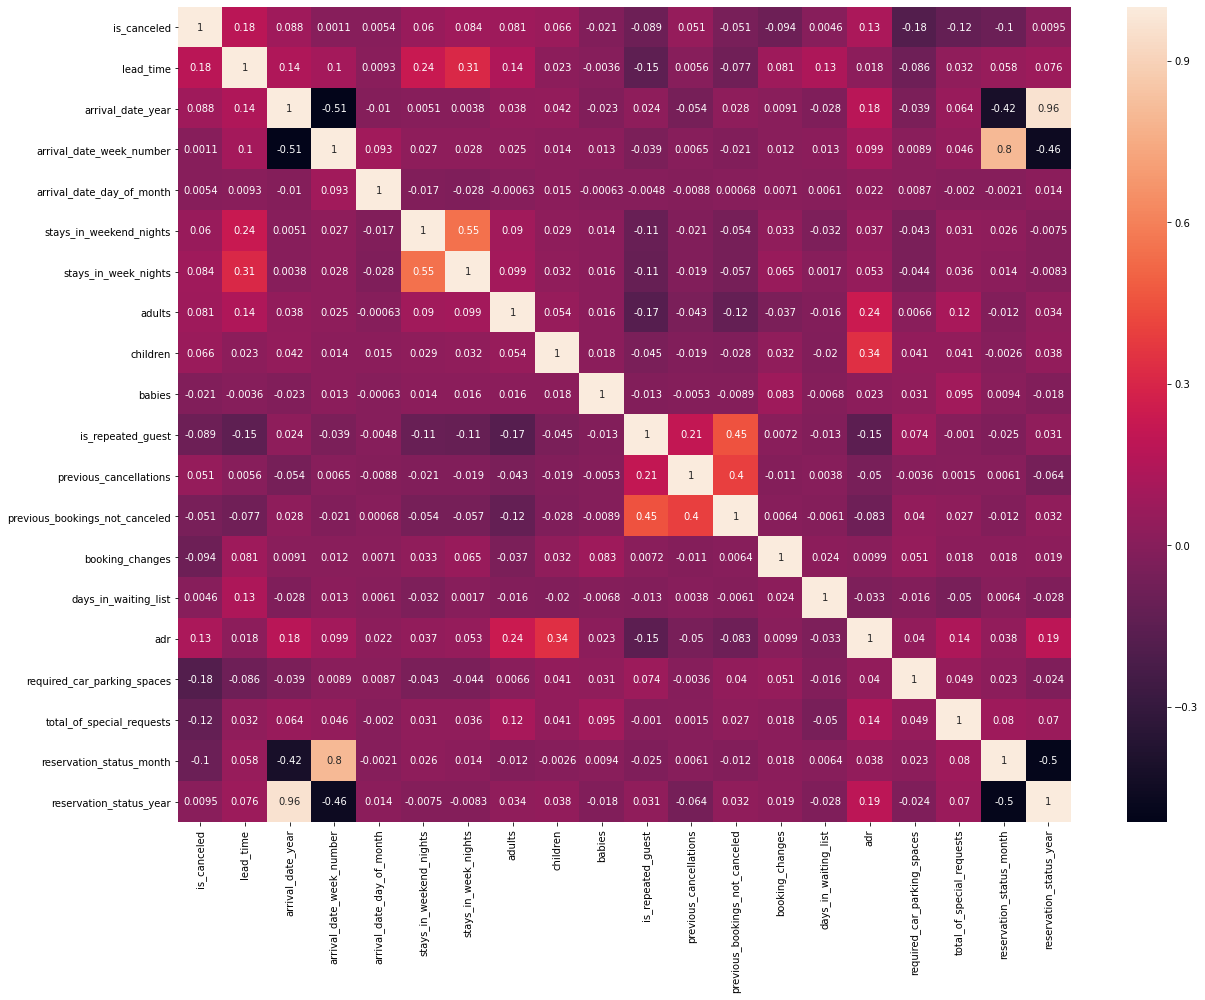

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(bookings_df.corr(), annot=True);

### Splitting the data - Train and Test

In [8]:
def split_data(df, X):
    y = df['is_canceled']
    
    #split 80% of the data to the training set while 20% of the data to test set
    return train_test_split(X, y, test_size=0.2) 

### K Neighbors Classifier

In [9]:
def KNN(X_train, X_test, y_train, y_test):
    param_grid = dict(n_neighbors = [3,5,7,9])
    grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring= 'f1_weighted')
    grid.fit(X_train, y_train);

    model = KNeighborsClassifier(n_neighbors = grid.best_params_['n_neighbors'])
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    results =  metrics.classification_report(y_test, y_pred, output_dict = True)
    
    return  [results['accuracy'], results['weighted avg']['precision'], 
             results['weighted avg']['recall'], results['weighted avg']['f1-score'], 
             model.score(X_train, y_train), grid.best_params_['n_neighbors']]

### Logistic Regression

In [10]:
def LogReg(X_train, X_test, y_train, y_test):
    param_grid = dict(C = np.linspace(0,1,10)[1:])
    grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5, scoring='f1_weighted') 
    grid.fit(X_train, y_train);
    
    model = LogisticRegression(C = grid.best_params_['C'], solver='liblinear')
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    results =  metrics.classification_report(y_test, y_pred, output_dict = True)
    
    return  [results['accuracy'], results['weighted avg']['precision'], 
             results['weighted avg']['recall'], results['weighted avg']['f1-score'],
             model.score(X_train, y_train),  grid.best_params_['C']]

### Decision Tree Classifier

In [11]:
def DTree(X_train, X_test, y_train, y_test):
    param_grid = dict(max_depth = range(1,20))
    grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1_weighted')
    grid.fit(X_train, y_train);
    
    model = DecisionTreeClassifier(max_depth= grid.best_params_['max_depth'])
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    results =  metrics.classification_report(y_test, y_pred, output_dict = True)
    
    return  [results['accuracy'], results['weighted avg']['precision'], 
             results['weighted avg']['recall'], results['weighted avg']['f1-score'], 
             model.score(X_train, y_train), grid.best_params_['max_depth']]

### Naive Bayes

In [12]:
def NB(X_train, X_test, y_train, y_test):
    param_grid = dict(var_smoothing = np.linspace(0,1,10)[1:])
    grid = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='f1_weighted') 
    grid.fit(X_train, y_train); 
   
    model = GaussianNB(var_smoothing = grid.best_params_['var_smoothing'])
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    results =  metrics.classification_report(y_test, y_pred, output_dict = True)
    
    return  [results['accuracy'], results['weighted avg']['precision'], 
             results['weighted avg']['recall'], results['weighted avg']['f1-score'], 
             model.score(X_train, y_train), grid.best_params_['var_smoothing']]

### Random Forest Classifier

In [13]:
def RandForest(X_train, X_test, y_train, y_test, depth):
    param_grid = dict(n_estimators = [5,15,25,35])
    grid = GridSearchCV(RandomForestClassifier(max_depth = depth), param_grid, cv=5, scoring='f1_weighted') 
    grid.fit(X_train, y_train); 
    
    model = RandomForestClassifier(max_depth = depth, n_estimators = grid.best_params_['n_estimators'])
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    results =  metrics.classification_report(y_test, y_pred, output_dict = True)
    
    return  [results['accuracy'], results['weighted avg']['precision'], 
             results['weighted avg']['recall'], results['weighted avg']['f1-score'], 
             model.score(X_train, y_train), grid.best_params_['n_estimators']]

### Gradient Boosting Classifier

In [14]:
def GradientBoosting(X_train, X_test, y_train, y_test, depth):
    param_grid = dict(n_estimators = [5,15,25,35])
    grid = GridSearchCV(GradientBoostingClassifier(max_depth = depth), param_grid, cv=5, scoring='f1_weighted') 
    grid.fit(X_train, y_train);
    
    model = GradientBoostingClassifier(max_depth=depth,  n_estimators = grid.best_params_['n_estimators'])
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    results =  metrics.classification_report(y_test, y_pred, output_dict = True)
    
    return  [results['accuracy'], results['weighted avg']['precision'], 
             results['weighted avg']['recall'], results['weighted avg']['f1-score'], 
             model.score(X_train, y_train), grid.best_params_['n_estimators']]

### Bagging Classifier

In [15]:
def Bagging(X_train, X_test, y_train, y_test, depth):
    param_grid = dict(base_estimator = [DecisionTreeClassifier(max_depth=depth)] , n_estimators = [5,15,25,35])
    grid = GridSearchCV(BaggingClassifier(), param_grid, cv=5, scoring='f1_weighted')
    grid.fit(X_train, y_train)
    
    model = BaggingClassifier(base_estimator = grid.best_params_['base_estimator'], n_estimators = grid.best_params_['n_estimators']) 
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    results =  metrics.classification_report(y_test, y_pred, output_dict = True)
    
    return  [results['accuracy'], results['weighted avg']['precision'], 
             results['weighted avg']['recall'], results['weighted avg']['f1-score'], 
             model.score(X_train, y_train), grid.best_params_['n_estimators']]

### Ada Boost Classifier

In [16]:
def AdaBoost(X_train, X_test, y_train, y_test, depth):
    param_grid = dict(base_estimator = [DecisionTreeClassifier(max_depth=depth)], n_estimators = [5,15,25,35])
    grid = GridSearchCV(AdaBoostClassifier(), param_grid, cv=5, scoring='f1_weighted') 
    grid.fit(X_train, y_train)
    
    model = AdaBoostClassifier(base_estimator = grid.best_params_['base_estimator'], n_estimators = grid.best_params_['n_estimators'])
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    results =  metrics.classification_report(y_test, y_pred, output_dict = True)
    
    return  [results['accuracy'], results['weighted avg']['precision'], 
             results['weighted avg']['recall'], results['weighted avg']['f1-score'], 
             model.score(X_train, y_train), grid.best_params_['n_estimators']]

### Collecting All Results

In [17]:
def get_results(X_train, X_test, y_train, y_test):
    knn = KNN(X_train, X_test, y_train, y_test)
    lr = LogReg(X_train, X_test, y_train, y_test)
    dt =  DTree(X_train, X_test, y_train, y_test)
    nb = NB(X_train, X_test, y_train, y_test)
    rf = RandForest(X_train, X_test, y_train, y_test, dt[5])
    gb = GradientBoosting(X_train, X_test, y_train, y_test, dt[5])
    bag = Bagging(X_train, X_test, y_train, y_test, dt[5])
    ab = AdaBoost(X_train, X_test, y_train, y_test, dt[5])
    
    return pd.DataFrame(data = [knn, lr, dt, nb, rf, gb, bag, ab], 
                        columns=['Accuracy','Precision','Recall','F1', 'Train Accuracy', 'Best Params'],
                        index = ['K Neighbors','Logistic Regression', 'Decision Tree', 'Naive Bayes', 'Random Forest', 
                                 'Gradient Boosting', 'Bagging','Ada Boost'])

### Training Classification Models

**Experiment 1 - Fit the models on the data after cleaning.**

In [18]:
X = encoded_bookings_df.drop(columns=['is_canceled'])
X_train_1, X_test_1, y_train_1, y_test_1 = split_data(encoded_bookings_df, X)

In [19]:
results_exp1 = get_results(X_train_1, X_test_1, y_train_1, y_test_1)
results_exp1.sort_values('F1', ascending=False)

,Accuracy,Precision,Recall,F1,Train Accuracy,Best Params
Bagging,0.924250,0.925930,0.924250,0.921561,0.962558,35.000000
Gradient Boosting,0.922806,0.922430,0.922806,0.921018,0.994597,35.000000
Random Forest,0.899405,0.902012,0.899405,0.894290,0.930417,25.000000
Decision Tree,0.896054,0.894206,0.896054,0.893987,0.953833,17.000000
Ada Boost,0.894320,0.892400,0.894320,0.892143,0.998339,35.000000
Logistic Regression,0.897614,0.908197,0.897614,0.889831,0.897814,0.666667
K Neighbors,0.749119,0.737189,0.749119,0.741323,0.864114,3.000000
Naive Bayes,0.719478,0.660409,0.719478,0.648328,0.715689,0.111111


**Experiment 2 - Fit the models on the data without outliers.**

In [20]:
X = encoded_bookings_df_no_outliers.drop(columns=['is_canceled'])
X_train_2, X_test_2, y_train_2, y_test_2 = split_data(encoded_bookings_df_no_outliers, X)

In [22]:
results_exp2 = get_results(X_train_2, X_test_2, y_train_2, y_test_2)
results_exp2.sort_values('F1', ascending=False)

,Accuracy,Precision,Recall,F1,Train Accuracy,Best Params
Bagging,0.924011,0.924889,0.924011,0.921669,0.975632,35.000000
Gradient Boosting,0.920486,0.919925,0.920486,0.918755,0.996899,35.000000
Random Forest,0.903904,0.905194,0.903904,0.899879,0.954511,35.000000
Ada Boost,0.900770,0.899305,0.900770,0.898484,0.998254,25.000000
Decision Tree,0.895287,0.893528,0.895287,0.893743,0.961432,19.000000
Logistic Regression,0.894568,0.905626,0.894568,0.886394,0.894578,0.555556
K Neighbors,0.745920,0.732809,0.745920,0.737102,0.868610,3.000000
Naive Bayes,0.718501,0.656745,0.718501,0.638616,0.718874,0.111111


**Experiment 3 - Fit the models on the data with selected features.**

In [23]:
#efs = ExhaustiveFeatureSelector(BEST MODEL ,min_features = 10, max_features = 10, scoring = 'f1_weighted', cv = 5)
#efs.fit(X_train_1, y_train_1)
#print('Best Features:',efs.best_feature_names_)
#print('Best Score:',efs.best_score_)

In [24]:
#X = encoded_bookings_df[['BEST FEATURES']]
#X_train_3, X_test_3, y_train_3, y_test_3 = split_data(encoded_bookings_df, X)

In [25]:
#results_exp3 = get_results(X_train, X_test, y_train, y_test, depth)
#results_exp3.sort_values('Recall', ascending=False)

### Feature Importance

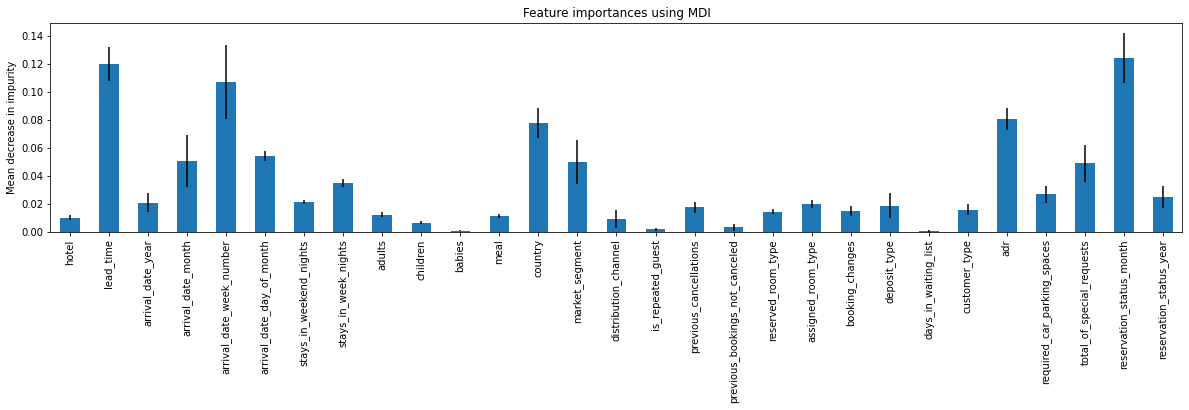

In [26]:
#Experiment 1
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_1, y_train_1)

importances = forest.feature_importances_
feature_names = list(X.columns)
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.set_size_inches(18.5, 10.5)

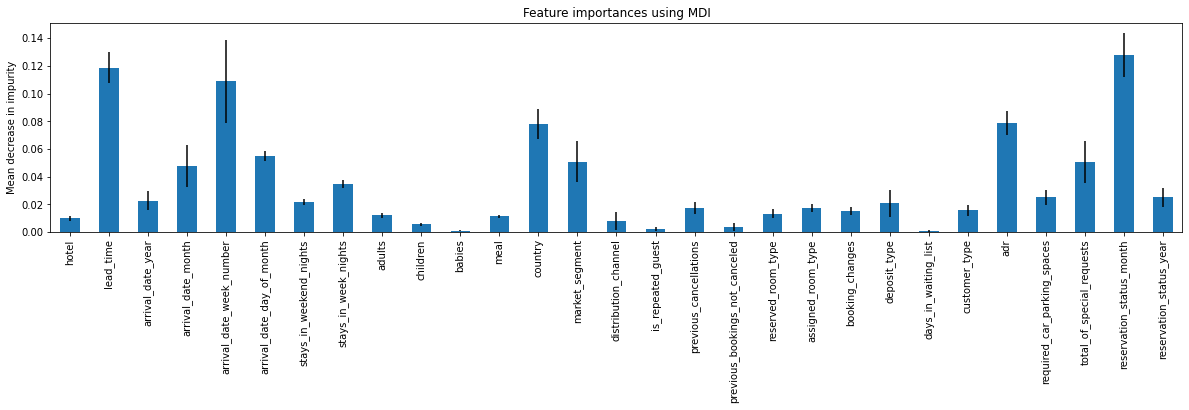

In [27]:
#Experiment 2
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_2, y_train_2)

importances = forest.feature_importances_
feature_names = list(X.columns)
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.set_size_inches(18.5, 10.5)